In [213]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install scienceplots
import scienceplots as sp
!pip install seaborn
import seaborn as sb
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize

In [286]:
data = pd.read_csv('C:/Users/ragin/Downloads/Real_Estate.csv')

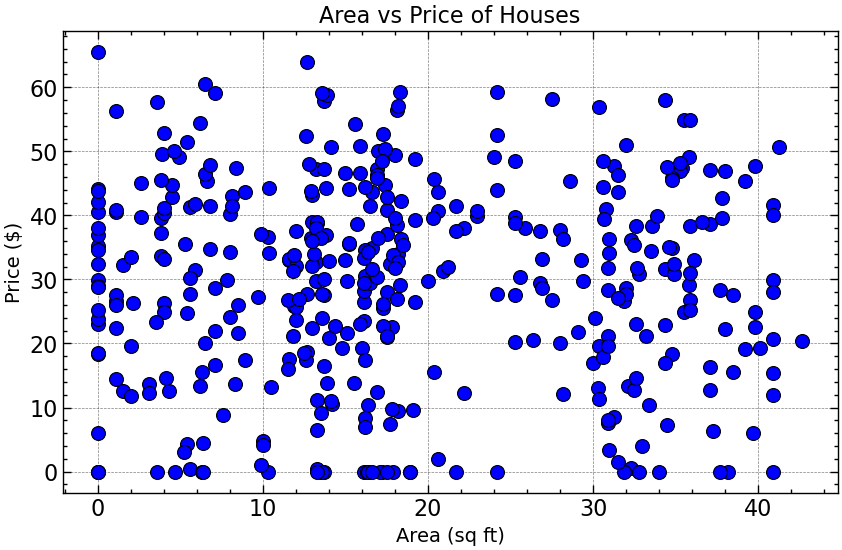

In [287]:
# Set a science plot style for a better look
plt.style.use(['science', 'notebook', 'grid'])

# Create the plot
plt.figure(figsize=(10, 6))
sb.scatterplot(x='House age', y='House price of unit area', data=data, color='b', s=100, edgecolor='black')

# Add title and labels
plt.title('Area vs Price of Houses', fontsize=16)
plt.xlabel('Area (sq ft)', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)

# Show the plot
plt.show()

In [288]:
# Prepare the data and store in Matrix format
x = data['House age'].values.reshape(-1,1)
y = data['House price of unit area'].values.reshape(-1,1)

In [289]:
n = x.shape[0]

In [290]:
# Normalize the data
x_min = np.min(x)
x_max = np.max(x)

y_min = np.min(y)
y_max = np.max(y)

x = (x - x_min) / (x_max - x_min)
y = (y - y_min) / (y_max - y_min)

In [291]:
def cost_function(x, y, w, b):
# Cost funtion using Iterative Approach
    total_cost = 0
    for i in range(n):
        total_cost += (y[i] - (w*x[i] + b))**2
    return total_cost / float(n)

def vectorised_cost_function(x,y,w,b):
# Cost function using Vectorised Approach
    
    total_cost = 0
    total_cost = np.sum((y - (w*x + b))**2)/(2*n)
    return total_cost

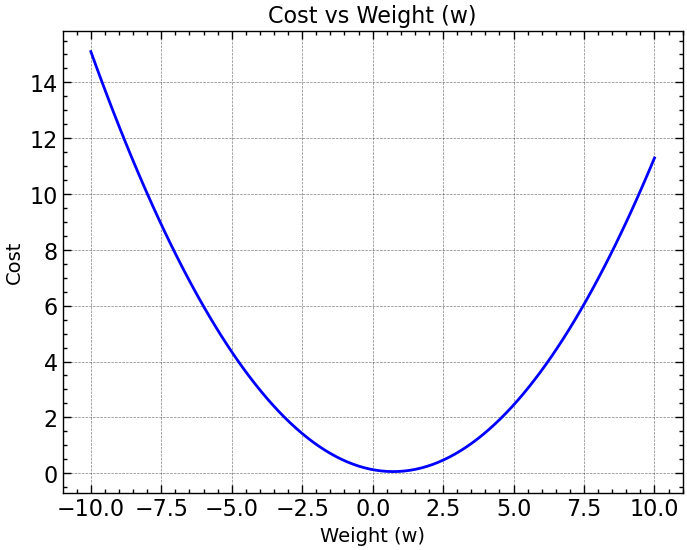

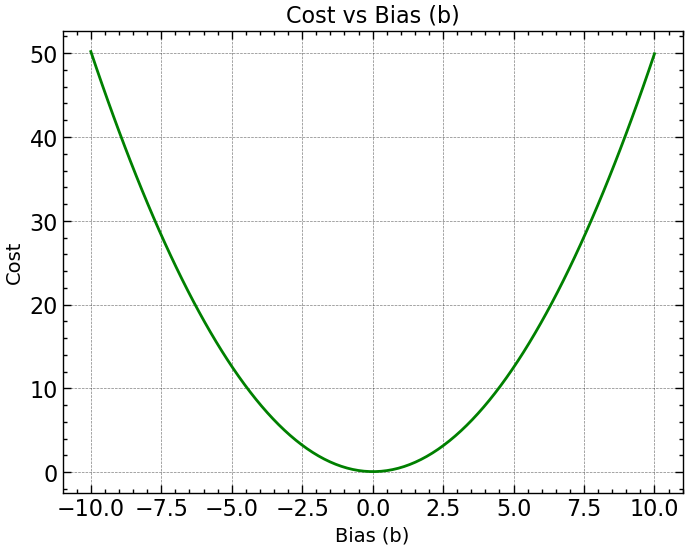

In [292]:
w_values = np.linspace(-10, 10, 100)  # Range of w values
b = 0  # Keeping b constant
costs_w = []  # To store costs for different w values

# Iterate over different values of w and calculate the cost
for w in w_values:
    cost = vectorised_cost_function(x, y, w, b)
    costs_w.append(cost)

# Plot Cost vs w
plt.figure(figsize=(8, 6))
plt.plot(w_values, costs_w, label="Cost vs w", color="b")
plt.title("Cost vs Weight (w)", fontsize=16)
plt.xlabel("Weight (w)", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.grid(True)
plt.show()

# Now for Cost vs b
b_values = np.linspace(-10, 10, 100)  # Range of b values
w = 1  # Keeping w constant
costs_b = []  # To store costs for different b values

# Iterate over different values of b and calculate the cost
for b in b_values:
    cost = vectorised_cost_function(x, y, w, b)
    costs_b.append(cost)

# Plot Cost vs b
plt.figure(figsize=(8, 6))
plt.plot(b_values, costs_b, label="Cost vs b", color="g")
plt.title("Cost vs Bias (b)", fontsize=16)
plt.xlabel("Bias (b)", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.grid(True)
plt.show()


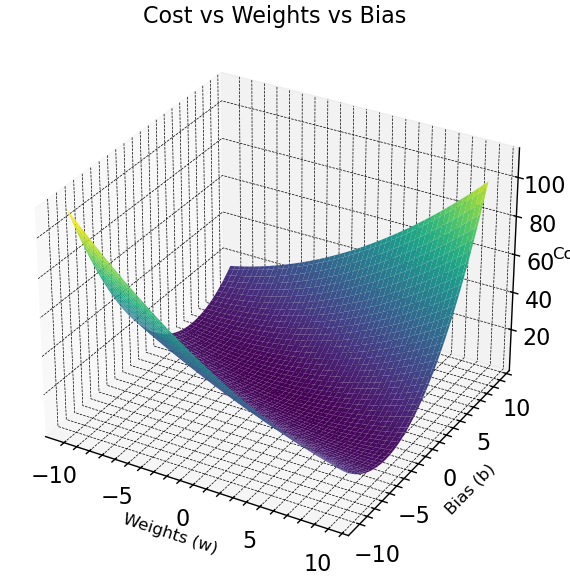

In [293]:
# Assuming x and y are normalized and available from your previous code
w_values = np.linspace(-10, 10, 100)  # Range of w values
b_values = np.linspace(-10, 10, 100)  # Range of b values

# Create a meshgrid for w and b
W, B = np.meshgrid(w_values, b_values)

# Calculate the cost for each (w, b) pair
Costs = np.zeros(W.shape)

# Iterate over the meshgrid and compute the cost
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        w = W[i, j]
        b = B[i, j]
        Costs[i, j] = vectorised_cost_function(x, y, w, b)

# Plot the 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(W, B, Costs, cmap='viridis')

# Labels and title
ax.set_title('Cost vs Weights vs Bias', fontsize=16)
ax.set_xlabel('Weights (w)', fontsize=12)
ax.set_ylabel('Bias (b)', fontsize=12)
ax.set_zlabel('Cost', fontsize=12)

plt.show()


In [294]:
def gradient_descent(x, y, w, b, a, iterations):
    w_history = []
    b_history = []
    cost_history = []

    for i in range(iterations):
        dw = -(2/n) * np.sum((y - (w*x + b)) * x)
        db = -(2/n) * np.sum(y - (w*x + b))

        w_history.append(w)
        b_history.append(b)
        cost_history.append(vectorised_cost_function(x, y, w, b))

        w = w - a * dw
        b = b - a * db

    return w, b, w_history, b_history, cost_history

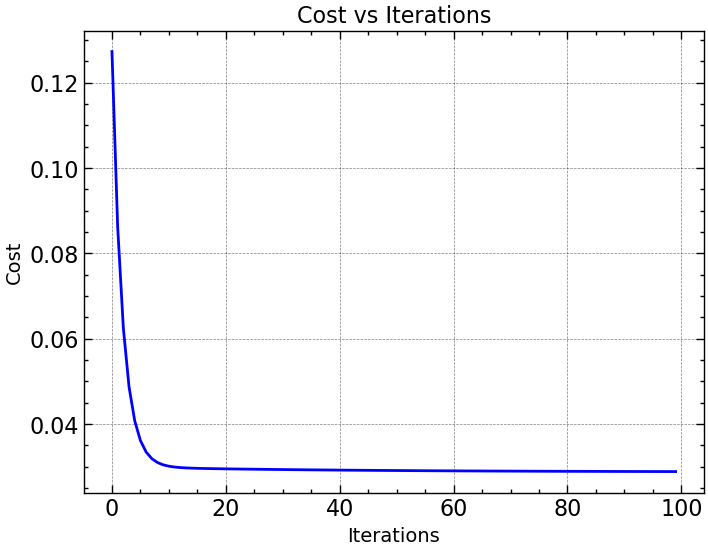

In [295]:
# Plot Cost vs Iterations
def plot_cost_vs_iterations(cost_history, iterations):
    plt.figure(figsize=(8, 6))
    plt.plot(range(iterations), cost_history, label='Cost', color='b')
    plt.title("Cost vs Iterations", fontsize=16)
    plt.xlabel("Iterations", fontsize=14)
    plt.ylabel("Cost", fontsize=14)
    plt.grid(True)
    plt.show()

# Perform gradient descent to get the necessary values
w_initial = 0
b_initial = 0
alpha = 0.1  # Learning rate
iterations = 100  # Number of iterations

# Assuming x, y, and n are already defined
w, b, w_history, b_history, cost_history = gradient_descent(x, y, w_initial, b_initial, alpha, iterations)

# Now call the plotting function with the cost history
plot_cost_vs_iterations(cost_history, iterations)


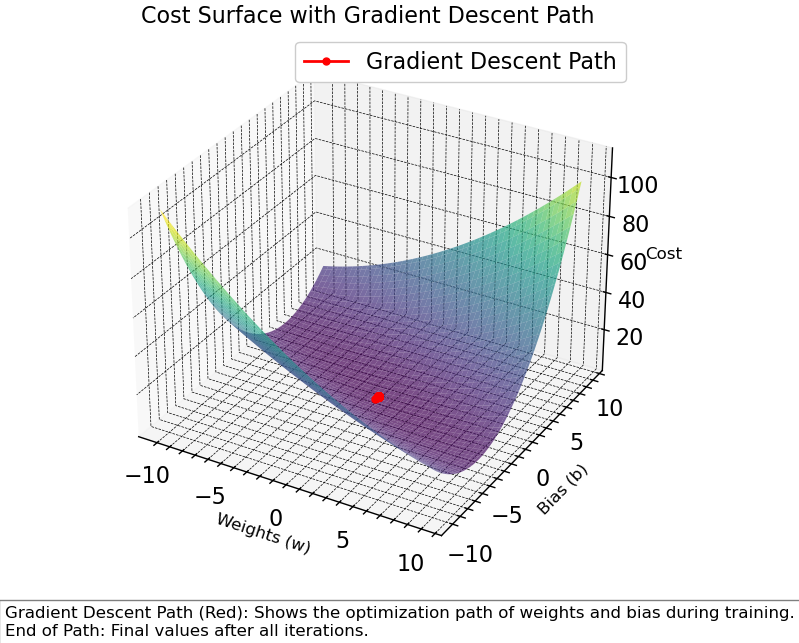

In [296]:
# Plot the 3D figure for cost surface and gradient descent path
def plot_3d_gradient_descent_path(w_history, b_history, cost_history, W, B, Costs):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the cost surface
    ax.plot_surface(W, B, Costs, cmap='viridis', alpha=0.7)
    
    # Plot the gradient descent path
    ax.plot(w_history, b_history, cost_history, color='r', marker='o', linestyle='-', linewidth=2, markersize=5, label='Gradient Descent Path')
    
    # Labels
    ax.set_title('Cost Surface with Gradient Descent Path', fontsize=16)
    ax.set_xlabel('Weights (w)', fontsize=12)
    ax.set_ylabel('Bias (b)', fontsize=12)
    ax.set_zlabel('Cost', fontsize=12)
    
    # Show legend
    ax.legend(loc='best')
    
    # Adding a text box outside the plot for additional information
    plt.figtext(0.15, 0.02, 'Gradient Descent Path (Red): Shows the optimization path of weights and bias during training.\n'
                            'End of Path: Final values after all iterations.',
                wrap=True, horizontalalignment='left', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    plt.show()

# Example usage (assuming these variables are defined elsewhere):
# w_history, b_history, cost_history, W, B, Costs
plot_3d_gradient_descent_path(w_history, b_history, cost_history, W, B, Costs)


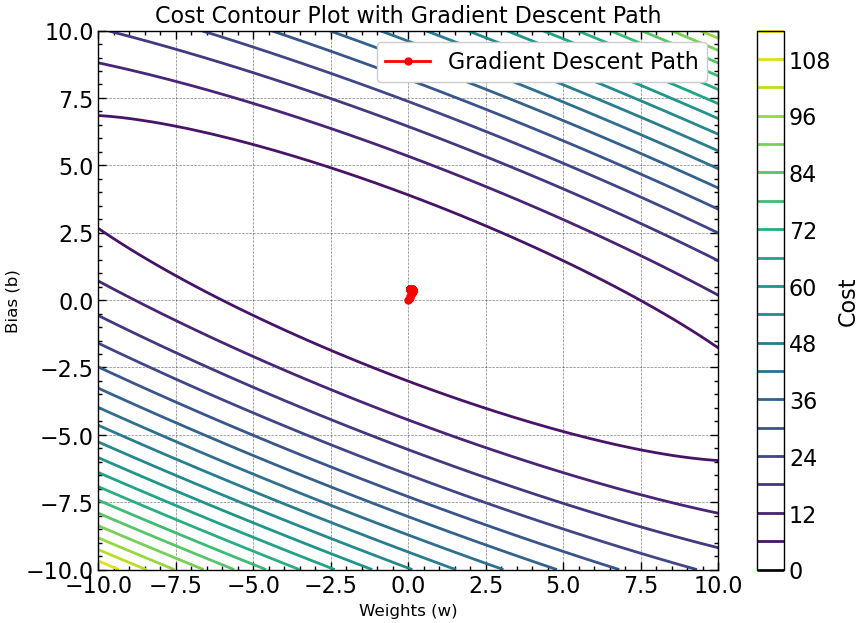

In [297]:
import numpy as np
import matplotlib.pyplot as plt

# Create a contour plot of the cost function surface with gradient descent path
def plot_contour_gradient_descent_path(w_history, b_history, cost_history, W, B, Costs):
    fig, ax = plt.subplots(figsize=(10, 7))
    
    # Create contour plot with lines
    contour = ax.contour(W, B, Costs, levels=20, cmap='viridis')
    plt.colorbar(contour, ax=ax, label='Cost')
    
    # Plot the gradient descent path
    ax.plot(w_history, b_history, color='r', marker='o', linestyle='-', linewidth=2, markersize=5, label='Gradient Descent Path')
    
    # Labels
    ax.set_title('Cost Contour Plot with Gradient Descent Path', fontsize=16)
    ax.set_xlabel('Weights (w)', fontsize=12)
    ax.set_ylabel('Bias (b)', fontsize=12)
    
    # Show legend
    ax.legend(loc='best')

    plt.show()

# Example usage (assuming these variables are defined elsewhere):
# w_history, b_history, cost_history, W, B, Costs
plot_contour_gradient_descent_path(w_history, b_history, cost_history, W, B, Costs)


In [298]:
def linear_regression(x, y, w, b, a, iterations=10000):
    # Linear Regression with Gradient Descent with Learning Rate[a]
    
    previous_cost = vectorised_cost_function(x, y, w, b)
    current_cost = 10
    count = 0

    while abs(current_cost - previous_cost) > 1e-5:  
        count += 1
        previous_cost = current_cost
        
        # Perform gradient descent
        w, b, _, _, _ = gradient_descent(x, y, w, b, a, 1)  # Perform one iteration of gradient descent
        
        current_cost = vectorised_cost_function(x, y, w, b)  
        print(f"Iteration {count}: w = {w}, b = {b}, cost = {current_cost}")
        
        if count > iterations:  # Ensure the loop does not run indefinitely
            print("Stopping after 10000 iterations to prevent infinite loop.")
            break
        
    return w, b, count, current_cost



In [299]:
# Initializing Weights, Bias, Learning Rate, and Iterations
w = np.random.randn() * 0.01  
b = np.random.randn() * 0.01  
a = 0.0001
iterations = 10000  # Set the number of iterations

# Run Linear Regression on the given data
final_w, final_b, num_iterations, final_cost = linear_regression(x, y, w, b, a, iterations)

# ANSI escape codes for bold text
bold = '\033[1m'
reset = '\033[0m'

# Print final results with bold text
print(f"{bold}Final weight:{reset} {final_w}")
print(f"{bold}Final bias:{reset} {final_b}")
print(f"{bold}Number of iterations:{reset} {num_iterations}")
print(f"{bold}Final cost:{reset} {final_cost}")


Iteration 1: w = 0.004373892843896365, b = -0.0006494384990351922, cost = 0.12672593717752342
Iteration 2: w = 0.004411818312163519, b = -0.0005609213347379936, cost = 0.12667957458258364
Iteration 3: w = 0.004449734166740694, b = -0.0004724251432928193, cost = 0.12663323419293215
Iteration 4: w = 0.004487640409938537, b = -0.0003839499196763369, cost = 0.12658691599792712
Iteration 5: w = 0.004525537044067145, b = -0.00029549565886641797, cost = 0.1265406199869318
Iteration 6: w = 0.0045634240714360575, b = -0.0002070623558421377, cost = 0.12649434614931462
Iteration 7: w = 0.004601301494354263, b = -0.00011865000558377452, cost = 0.1264480944744489
Iteration 8: w = 0.004639169315130194, b = -3.0258603072809865e-05, cost = 0.12640186495171327
Iteration 9: w = 0.0046770275360717315, b = 5.811185670807217e-05, cost = 0.12635565757049133
Iteration 10: w = 0.0047148761594862035, b = 0.00014646137877498503, cost = 0.1263094723201718
Iteration 11: w = 0.004752715187680384, b = 0.00023478996